## 1. Data Loading and Initial Exploration

In [1]:
import pandas as pd
path = '../bitcoin_price_sentiment.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              222 non-null    object 
 1   Open              222 non-null    float64
 2   High              222 non-null    float64
 3   Low               222 non-null    float64
 4   Close             222 non-null    float64
 5   Volume            222 non-null    float64
 6   sentiment_scores  222 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.3+ KB


In [2]:
df.head()

,date,Open,High,Low,Close,Volume,sentiment_scores
0,2021-02-05,37494.08,37506.29,37372.59,37423.85,31.356678,0.131285
1,2021-02-06,40329.59,40362.46,40328.95,40341.59,0.369795,0.137975
2,2021-02-07,38371.71,38371.71,38319.25,38319.25,2.961660,0.140346
3,2021-02-08,42739.45,42739.45,42661.76,42705.78,1.481081,0.155133
4,2021-02-09,47062.03,47097.63,47015.62,47072.73,23.373384,0.149979


In [3]:
df.shape

(222, 7)

In [4]:
# Check for and handle any missing values (e.g., imputation, removal)
print(df.isnull().sum())

date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
sentiment_scores    0
dtype: int64


# 2. Data Visualization

In [5]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Set 'date' as index
df.set_index('date', inplace=True)

Text(0, 0.5, 'Closing Price')

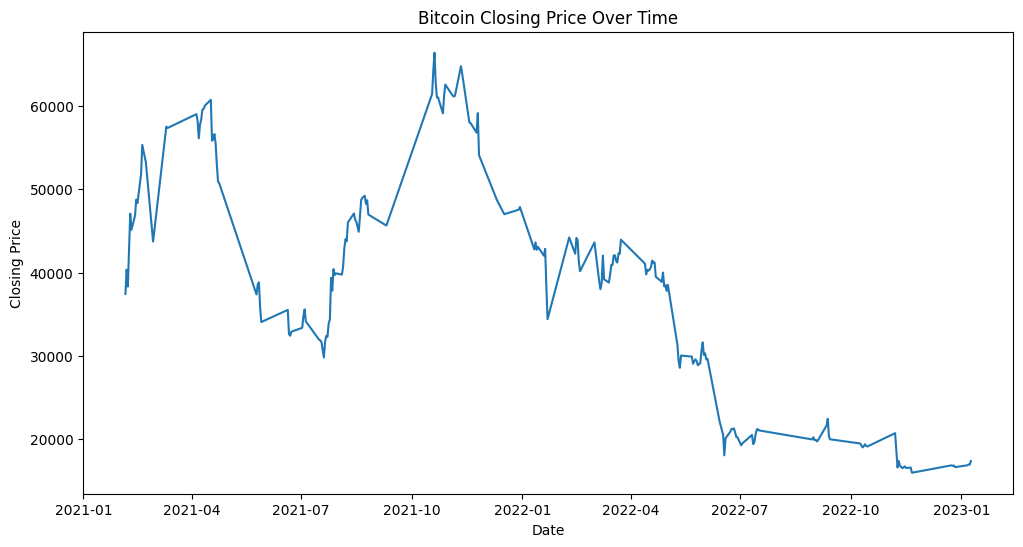

In [7]:
import matplotlib.pyplot as plt
# Bitcoin price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')

Text(0.5, 0, 'Closing Price')

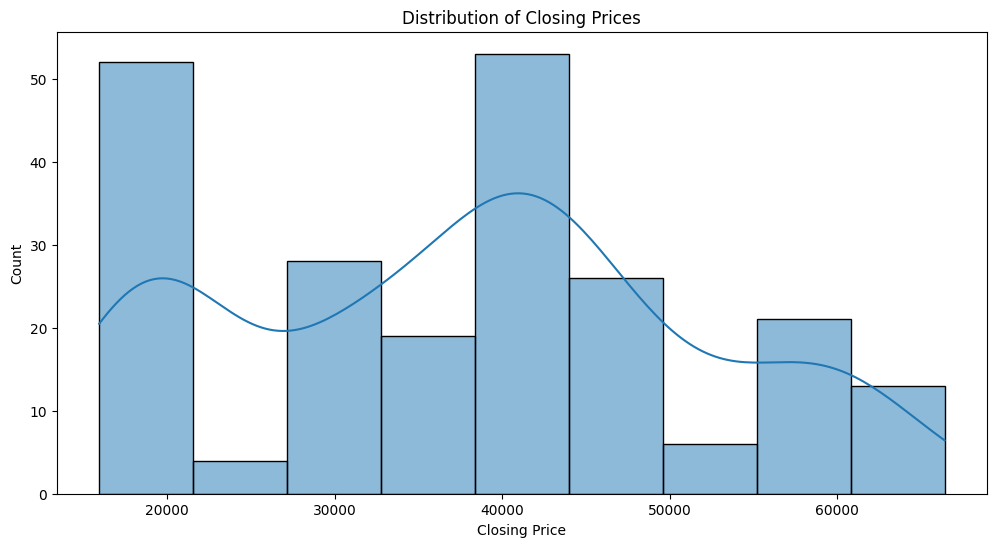

In [8]:
# Distribution of closing prices
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')

Text(0, 0.5, 'Volume')

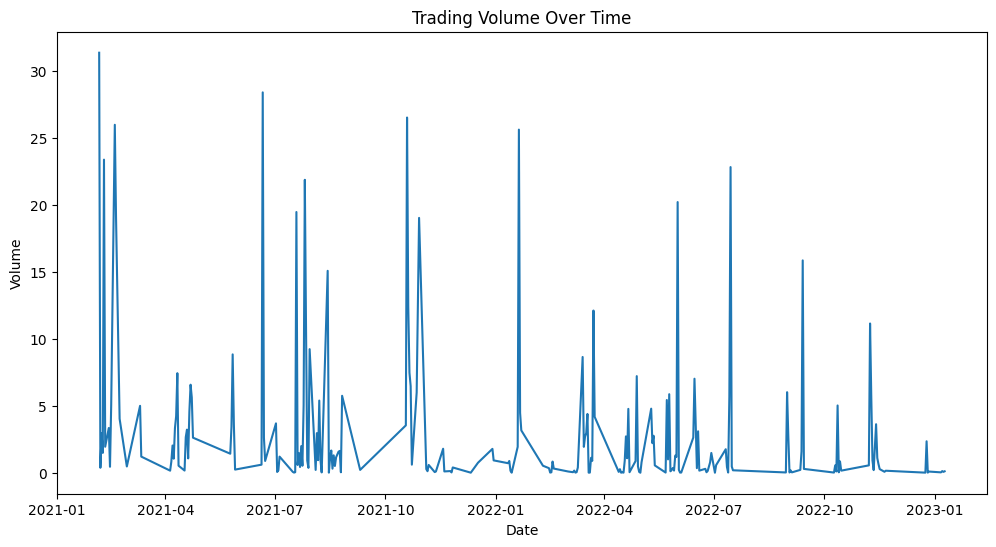

In [9]:
# Volume over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

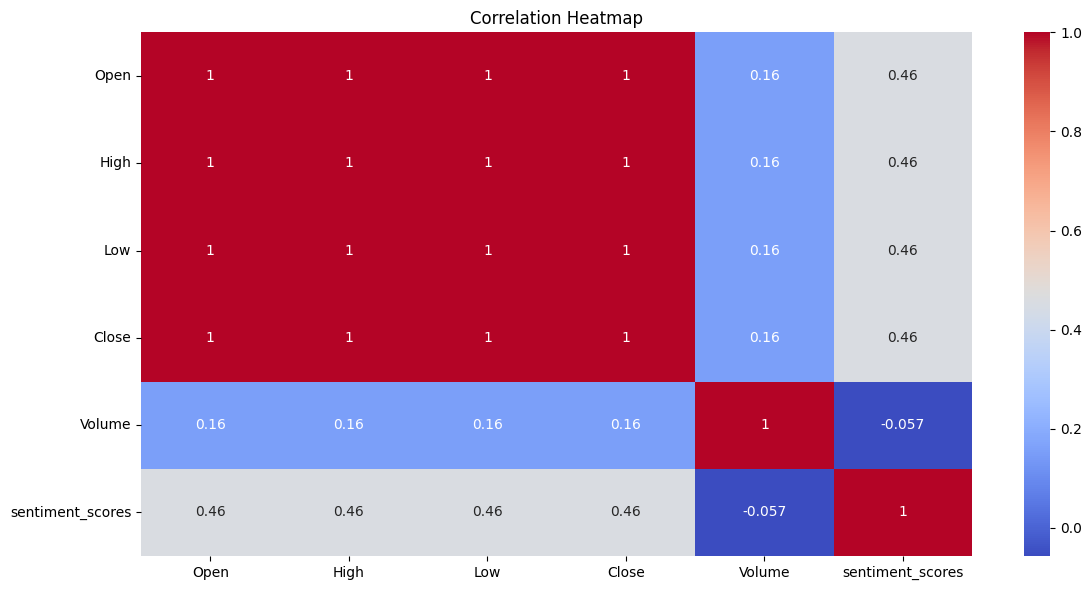

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**Key Findings:**
- The high correlation among price indicators (Open, High, Low, Close) is expected, as they all reflect the price of the same asset.
- The positive correlation between sentiment scores and price indicators suggests that market sentiment may have some influence on price movements.
- The weak correlation of volume with other indicators implies it may be influenced by additional factors not captured in this analysis.

# 3. Feature Selection and Data Preparation

In [11]:
# Feature Selection
selected_features = ['Open', 'Volume', 'sentiment_scores']
target = 'Close'

In [12]:
X = df[selected_features]
y = df[target]

In [13]:
# Data Normalization 
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = pd.DataFrame(scaler_X.fit_transform(X), columns=X.columns, index=X.index)
y_normalized = pd.DataFrame(scaler_y.fit_transform(y.values.reshape(-1, 1)), columns=[target], index=y.index)


In [14]:
print("Normalized X head:")
print(X_normalized.head())
print("\nNormalized y head:")
print(y_normalized.head())

Normalized X head:
                Open    Volume  sentiment_scores
date                                            
2021-02-05  0.426325  1.000000          0.170430
2021-02-06  0.482459  0.011793          0.190654
2021-02-07  0.443699  0.094451          0.197823
2021-02-08  0.530166  0.047233          0.242525
2021-02-09  0.615739  0.745404          0.226944

Normalized y head:
               Close
date                
2021-02-05  0.425534
2021-02-06  0.483364
2021-02-07  0.443281
2021-02-08  0.530222
2021-02-09  0.616775
